In [1]:
import numpy as np
import matplotlib.pyplot as plt

Documentation:
$\alpha$ = 0.1



In [4]:
a = np.linspace(0, 20*np.pi, 1000)
b = np.sin(a)

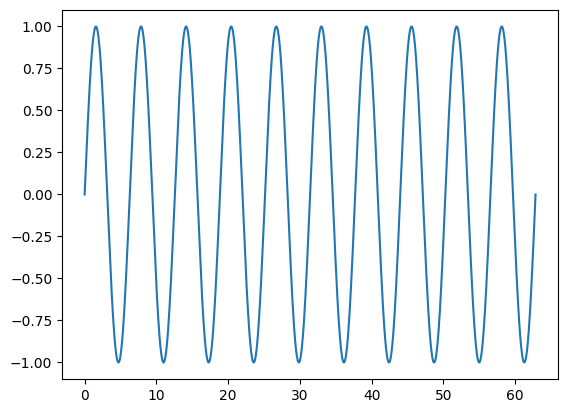

In [5]:
plt.plot(a, b)

In [1]:
# idea: AI noise cancellation software that you can run with a microphone and speaker

import pyaudio
import numpy as np

# Set up audio parameters
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024

# Initialize PyAudio
p = pyaudio.PyAudio()

# Start streaming
stream = p.open(format=FORMAT, channels=CHANNELS,
                 rate=RATE, input=True, output=True,
                 frames_per_buffer=CHUNK)

try:
    while True:
        # Read audio data
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)

        # Process audio_data here to generate anti-noise

        # Output the anti-noise signal
        anti_noise = -audio_data  # Simple inversion for demonstration
        stream.write(anti_noise.tobytes())

except KeyboardInterrupt:
    pass

# Clean up
stream.stop_stream()
stream.close()
p.terminate()

ModuleNotFoundError: No module named 'pyaudio'

In [7]:
def mul(x,y):
    i = 0
    mul = 0
    while i < y:
        mul += x
        i += 1
    return mul

mul(42,13)



546

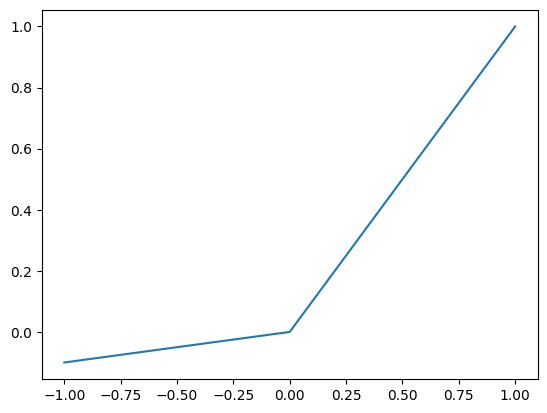

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def elu(x, alpha=1):
    # exponential linear unit
    y = []
    for i in range(len(x)):
        if x[i] > 0:
            y_ = x[i]
        elif x[i] <= 0:
            y_ = alpha*(np.exp(x[i]) - 1)
        y.append(y_)
    return np.array(y)

def prelu(x, alpha=.1):
    #parameterized relu
    y = []
    for i in range(len(x)):
        if x[i] > 0:
            y_ = x[i]
        elif x[i] <= 0:
            y_ = alpha*x[i]
        y.append(y_)
    return np.array(y)


x = np.linspace(-1, 1, 1000)
y = prelu (x)
plt.plot(x, y)


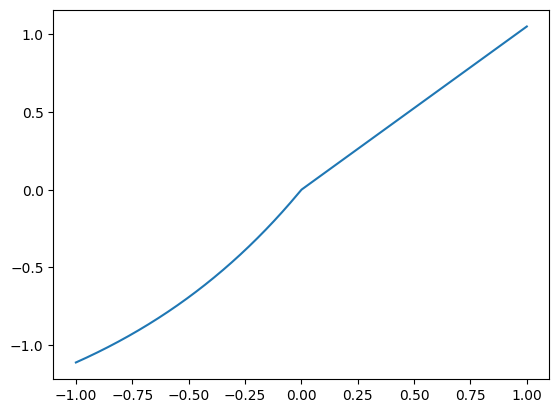

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = torch.linspace(-1, 1, 1000)
y = torch.nn.SELU()(x)
plt.plot(x, y)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib notebook  

class LeakyIntegrateAndFireNeuron:
    def __init__(self, tau=10, threshold=-50, reset_potential=-65, resting_potential=-65, resistance=10, dt=1, duration=200):
        self.tau = tau
        self.threshold = threshold
        self.reset_potential = reset_potential
        self.resting_potential = resting_potential
        self.resistance = resistance
        self.dt = dt
        self.duration = duration
        self.voltage = self.resting_potential
        self.voltage_trace = []
        self.time_values = np.arange(0, self.duration, self.dt)

    def step(self, input_current):
        dv = (-(self.voltage - self.resting_potential) + self.resistance * input_current) / self.tau
        self.voltage += dv * self.dt
        if self.voltage >= self.threshold:
            self.voltage = self.reset_potential
        self.voltage_trace.append(self.voltage)

    def run_simulation(self, input_current):
        self.voltage_trace = []
        for _ in range(len(self.time_values)):
            self.step(input_current)
        return self.time_values, self.voltage_trace

# Visualization function
def animate_neuron(neuron, input_current):
    time_values, voltage_trace = neuron.run_simulation(input_current)

    fig, ax = plt.subplots()
    ax.set_ylim(-70, 50)
    ax.set_xlim(0, neuron.duration)
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Membrane Potential (mV)")
    ax.set_title("Leaky Integrate-and-Fire Neuron Simulation")

    line, = ax.plot([], [], lw=2)

    def update(frame):
        line.set_data(time_values[:frame], voltage_trace[:frame])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(time_values), interval=20, blit=False)
    return HTML(ani.to_jshtml())

# Run in Jupyter Notebook
neuron = LeakyIntegrateAndFireNeuron()
input_current = 2
animate_neuron(neuron, input_current)


<IPython.core.display.Javascript object>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
# from biological_neuron import LeakyIntegrateAndFireNeuron

class NeuralNetwork:
    def __init__(self, num_neurons=3, connection_strength=0.5):
        self.neurons = [LeakyIntegrateAndFireNeuron() for _ in range(num_neurons)]
        self.connection_strength = connection_strength
        self.num_neurons = num_neurons
        self.voltage_traces = [[] for _ in range(num_neurons)]
        self.time_values = np.arange(0, self.neurons[0].duration, self.neurons[0].dt)
    
    def step(self, input_currents):
        """Simulates one time step of the neural network."""
        for i, neuron in enumerate(self.neurons):
            total_input = input_currents[i] + self.connection_strength * sum(self.voltage_traces[j][-1] if self.voltage_traces[j] else 0 for j in range(self.num_neurons) if j != i)
            neuron.step(total_input)
            self.voltage_traces[i].append(neuron.voltage)
    
    def run_simulation(self, input_currents):
        """Runs the full neural network simulation."""
        self.voltage_traces = [[] for _ in range(self.num_neurons)]
        for _ in range(len(self.time_values)):
            self.step(input_currents)
        return self.time_values, self.voltage_traces

# Visualization function
def animate_network(network, input_currents):
    """Animates real-time activity of multiple neurons."""
    time_values, voltage_traces = network.run_simulation(input_currents)
    
    fig, ax = plt.subplots()
    ax.set_ylim(-70, 50)
    ax.set_xlim(0, network.neurons[0].duration)
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Membrane Potential (mV)")
    ax.set_title("Neural Network Simulation")
    
    lines = [ax.plot([], [], lw=2, label=f"Neuron {i+1}")[0] for i in range(network.num_neurons)]
    
    def update(frame):
        for i, line in enumerate(lines):
            line.set_data(time_values[:frame], voltage_traces[i][:frame])
        return lines
    
    ani = animation.FuncAnimation(fig, update, frames=len(time_values), interval=20, blit=False)
    plt.legend()
    return HTML(ani.to_jshtml())

if __name__ == "__main__":
    network = NeuralNetwork(num_neurons=3, connection_strength=0.5)
    input_currents = [2, 1.5, 1]  # Different input currents for each neuron
    animate_network(network, input_currents)

<IPython.core.display.Javascript object>

--- Hopfield Network Simulations ---

--- Original Patterns to Store ---


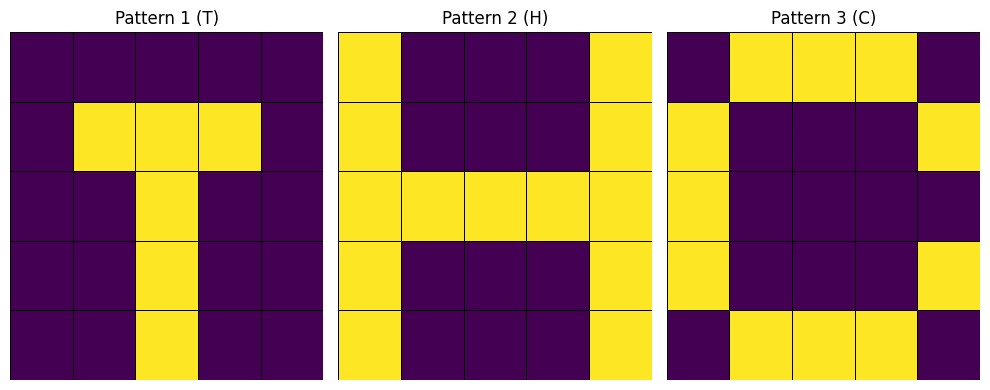

Training Hopfield Network with 3 patterns...
Training complete. Weights updated.

--- Simulation 1: Perfect Pattern Retrieval ---
Retrieving pattern...
Converged after 1 iterations.

Initial State (Perfect):


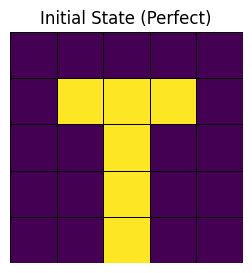


Retrieved Pattern (Perfect):


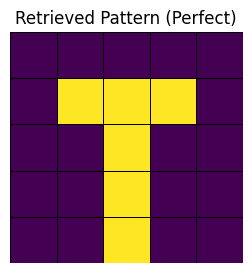

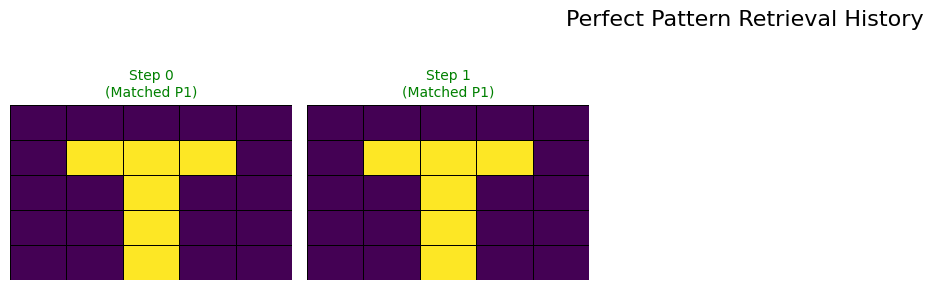


--- Simulation 2: Noisy Pattern Retrieval ---
Initial State (Noisy - 20.0% noise):


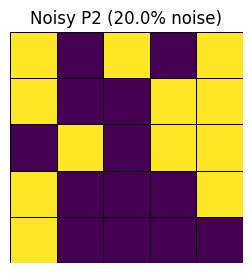

Retrieving pattern...
Converged after 2 iterations.

Retrieved Pattern (Noisy):


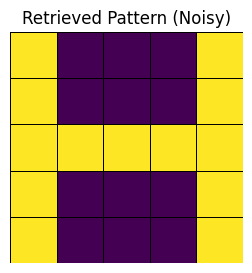

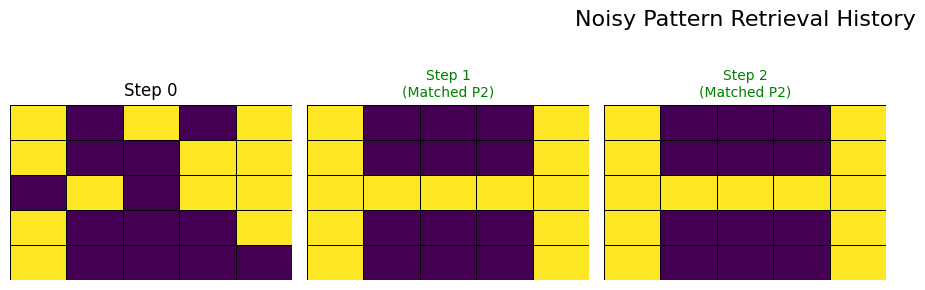

Success! Noisy pattern converged to the original Pattern 2.

--- Simulation 3: Incomplete Pattern Retrieval ---
Initial State (Incomplete):


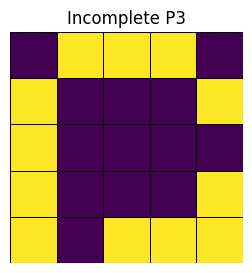

Retrieving pattern...
Converged after 2 iterations.

Retrieved Pattern (Incomplete):


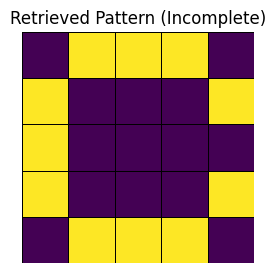

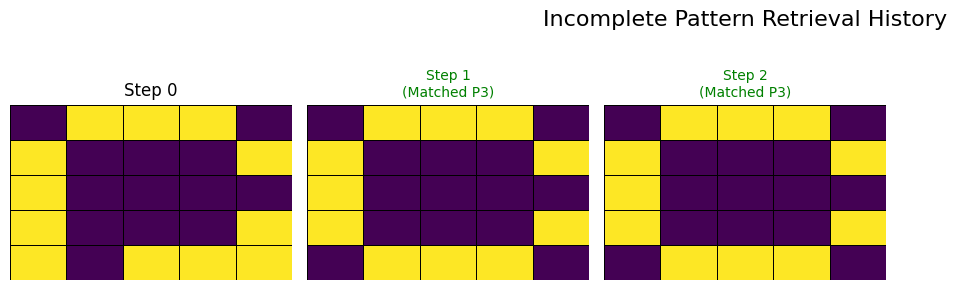

Success! Incomplete pattern converged to the original Pattern 3.

--- Simulation 4: Energy Function Test ---
Energy of Pattern 1: -328.00
Energy of Pattern 2: -320.00
Energy of Pattern 3: -292.00
Energy of Noisy Pattern 1: -276.00

Energy over retrieval history (Noisy Pattern):
Step 0: Energy = -100.00
Step 1: Energy = -320.00
Step 2: Energy = -320.00


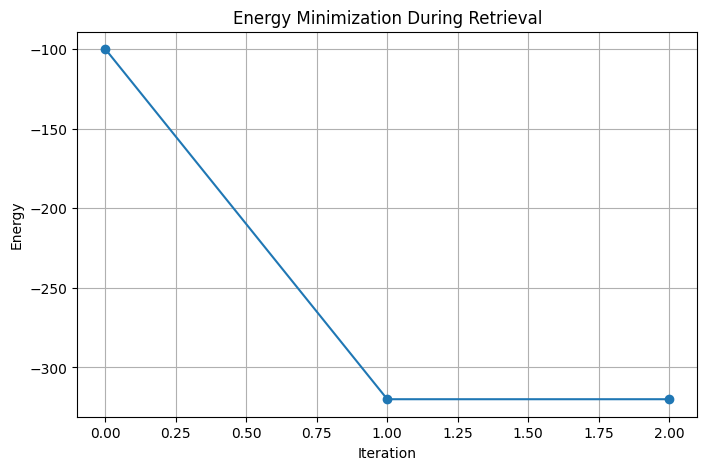


--- Simulations Complete ---


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class HopfieldNetwork:
    """
    Implements a discrete Hopfield Network, a type of recurrent artificial neural network
    that serves as an associative memory system. It's used to store and retrieve binary patterns.
    """

    def __init__(self, num_neurons):
        """
        Initializes the Hopfield Network.

        Args:
            num_neurons (int): The number of neurons in the network, which corresponds
                               to the dimensionality of the patterns to be stored.
        """
        self.num_neurons = num_neurons
        # Initialize the weight matrix (W) to zeros.
        # The weight matrix stores the learned patterns.
        # It's an N x N matrix where N is the number of neurons.
        # The diagonal elements are typically set to zero to prevent self-connections.
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        """
        Trains the Hopfield Network by storing a set of binary patterns.
        The training uses the Hebbian learning rule.

        Args:
            patterns (list of np.array): A list of binary patterns to be stored.
                                         Each pattern should be a 1D NumPy array
                                         of shape (num_neurons,) with values -1 or 1.
        """
        if not all(isinstance(p, np.ndarray) and p.shape == (self.num_neurons,) for p in patterns):
            raise ValueError(f"All patterns must be 1D NumPy arrays of size {self.num_neurons}")
        if not all(np.all(np.isin(p, [-1, 1])) for p in patterns):
            raise ValueError("All patterns must contain only -1 or 1 values.")

        print(f"Training Hopfield Network with {len(patterns)} patterns...")
        # For each pattern, update the weights using the Hebbian rule.
        for pattern in patterns:
            # Outer product of the pattern with itself: pattern.T @ pattern
            # This calculates the contribution of the current pattern to the weights.
            # (pattern.reshape(-1, 1) @ pattern.reshape(1, -1)) is another way to compute the outer product.
            self.weights += np.outer(pattern, pattern)
        
        # Set diagonal elements to zero to prevent self-connections.
        # This ensures that a neuron's activation is influenced only by other neurons,
        # which can help in stabilizing the network.
        np.fill_diagonal(self.weights, 0)
        print("Training complete. Weights updated.")

    def update(self, state, max_iterations=100, asynchronous=True):
        """
        Retrieves a stored pattern from a noisy or incomplete input state.
        The network iteratively updates its state until it converges to a stable pattern.

        Args:
            state (np.array): The initial input state (noisy or incomplete pattern).
                              Must be a 1D NumPy array of shape (num_neurons,) with values -1 or 1.
            max_iterations (int): The maximum number of iterations for the retrieval process.
                                  Prevents infinite loops if the network doesn't converge.
            asynchronous (bool): If True, updates neurons one by one (asynchronous update).
                                 If False, updates all neurons simultaneously (synchronous update).
                                 Asynchronous update generally ensures convergence in Hopfield networks.

        Returns:
            np.array: The retrieved (converged) pattern.
        """
        if not isinstance(state, np.ndarray) or state.shape != (self.num_neurons,):
            raise ValueError(f"Initial state must be a 1D NumPy array of size {self.num_neurons}")
        if not np.all(np.isin(state, [-1, 1])):
            raise ValueError("Initial state must contain only -1 or 1 values.")

        current_state = np.copy(state) # Make a copy to avoid modifying the original input
        history = [np.copy(current_state)] # Store states for visualization

        print("Retrieving pattern...")
        for i in range(max_iterations):
            previous_state = np.copy(current_state)

            if asynchronous:
                # Asynchronous update: randomly select a neuron and update it
                indices = np.arange(self.num_neurons)
                np.random.shuffle(indices) # Shuffle to pick neurons in a random order
                for j in indices:
                    # Calculate the net input to neuron j
                    # Sum of (weight[j][k] * state[k]) for all k
                    net_input = np.dot(self.weights[j, :], current_state)
                    # Apply the sign activation function
                    current_state[j] = 1 if net_input >= 0 else -1
            else:
                # Synchronous update: update all neurons simultaneously
                # Calculate net inputs for all neurons
                net_inputs = np.dot(self.weights, current_state)
                # Apply the sign activation function to all neurons
                current_state = np.where(net_inputs >= 0, 1, -1)

            history.append(np.copy(current_state))

            # Check for convergence: if the state hasn't changed, we've converged
            if np.array_equal(current_state, previous_state):
                print(f"Converged after {i+1} iterations.")
                return current_state, history
        
        print(f"Max iterations ({max_iterations}) reached without convergence.")
        return current_state, history

    def calculate_energy(self, state):
        """
        Calculates the energy of a given state in the Hopfield Network.
        The energy function is defined as E = -0.5 * sum_i sum_j (W_ij * s_i * s_j).
        The network aims to minimize this energy function during retrieval.

        Args:
            state (np.array): The state for which to calculate the energy.
                              Must be a 1D NumPy array of shape (num_neurons,) with values -1 or 1.

        Returns:
            float: The energy value of the state.
        """
        if not isinstance(state, np.ndarray) or state.shape != (self.num_neurons,):
            raise ValueError(f"State must be a 1D NumPy array of size {self.num_neurons}")
        if not np.all(np.isin(state, [-1, 1])):
            raise ValueError("State must contain only -1 or 1 values.")

        # E = -0.5 * sum_i sum_j (W_ij * s_i * s_j)
        # This can be efficiently calculated using matrix multiplication:
        # -0.5 * state.T @ weights @ state
        energy = -0.5 * np.dot(state.T, np.dot(self.weights, state))
        return energy

# --- Helper Functions for Visualization ---

def plot_pattern(pattern, title="Pattern", ax=None):
    """
    Plots a binary pattern as a heatmap. Assumes square patterns for visualization.

    Args:
        pattern (np.array): The pattern to plot. Must be a 1D NumPy array of -1 or 1.
        title (str): The title for the plot.
        ax (matplotlib.axes.Axes, optional): An existing axes object to plot on.
    """
    size = int(np.sqrt(len(pattern)))
    if size * size != len(pattern):
        print(f"Warning: Pattern length {len(pattern)} is not a perfect square. Plotting as 1D array.")
        # If not a perfect square, just plot as a single row.
        plot_data = pattern.reshape(1, -1)
    else:
        plot_data = pattern.reshape(size, size)

    if ax is None:
        fig, ax = plt.subplots(figsize=(3, 3))
    
    # Use 'viridis' colormap for distinct -1 (dark) and 1 (light) values.
    # Set vmin/vmax to ensure -1 and 1 map to distinct colors.
    sns.heatmap(plot_data, cmap='viridis', cbar=False, annot=False, fmt='d', ax=ax, vmin=-1, vmax=1,
                linewidths=0.5, linecolor='black')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([]) # Hide ticks for cleaner visualization

def plot_retrieval_history(history, stored_patterns, title="Retrieval History", max_cols=5):
    """
    Plots the sequence of states during pattern retrieval.

    Args:
        history (list of np.array): A list of states at each iteration during retrieval.
        stored_patterns (list of np.array): The patterns the network was trained on, to highlight matches.
        title (str): The main title for the plot.
        max_cols (int): Maximum number of columns for the subplots.
    """
    num_steps = len(history)
    num_rows = int(np.ceil(num_steps / max_cols))

    fig, axes = plt.subplots(num_rows, max_cols, figsize=(max_cols * 3, num_rows * 3))
    axes = axes.flatten() # Flatten the axes array for easy iteration

    for i, state in enumerate(history):
        if i < len(axes): # Ensure we don't try to plot more than available axes
            ax = axes[i]
            plot_pattern(state, title=f"Step {i}", ax=ax)
            # Check if the current state matches any of the stored patterns
            for sp_idx, sp in enumerate(stored_patterns):
                if np.array_equal(state, sp):
                    ax.set_title(f"Step {i}\n(Matched P{sp_idx+1})", color='green', fontsize=10)
                    break
        else:
            print(f"Warning: More history steps ({num_steps}) than available plot axes ({len(axes)}).")
            break
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# --- Example Simulations ---

if __name__ == "__main__":
    print("--- Hopfield Network Simulations ---")

    # Define some example binary patterns (e.g., simple images or characters)
    # Using -1 and 1 values.
    # For a 5x5 grid, we need 25 neurons.
    
    # Pattern 1: A "T" shape
    pattern1 = np.array([
        -1, -1, -1, -1, -1,
        -1,  1,  1,  1, -1,
        -1, -1,  1, -1, -1,
        -1, -1,  1, -1, -1,
        -1, -1,  1, -1, -1
    ])
    
    # Pattern 2: A "H" shape
    pattern2 = np.array([
         1, -1, -1, -1,  1,
         1, -1, -1, -1,  1,
         1,  1,  1,  1,  1,
         1, -1, -1, -1,  1,
         1, -1, -1, -1,  1
    ])

    # Pattern 3: A "C" shape
    pattern3 = np.array([
        -1,  1,  1,  1, -1,
         1, -1, -1, -1,  1,
         1, -1, -1, -1, -1,
         1, -1, -1, -1,  1,
        -1,  1,  1,  1, -1
    ])

    # Ensure all patterns have the same length
    assert len(pattern1) == len(pattern2) == len(pattern3), "All patterns must have the same length."
    
    # Determine the number of neurons from the pattern length
    num_neurons = len(pattern1)

    # Visualize the original patterns
    print("\n--- Original Patterns to Store ---")
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    plot_pattern(pattern1, title="Pattern 1 (T)", ax=axes[0])
    plot_pattern(pattern2, title="Pattern 2 (H)", ax=axes[1])
    plot_pattern(pattern3, title="Pattern 3 (C)", ax=axes[2])
    plt.tight_layout()
    plt.show()

    # Create and train the Hopfield Network
    network = HopfieldNetwork(num_neurons)
    stored_patterns = [pattern1, pattern2, pattern3]
    network.train(stored_patterns)

    # --- Simulation 1: Retrieval of a perfect pattern ---
    print("\n--- Simulation 1: Perfect Pattern Retrieval ---")
    initial_state_perfect = np.copy(pattern1) # Start with a perfectly stored pattern
    retrieved_pattern_perfect, history_perfect = network.update(initial_state_perfect)

    print("\nInitial State (Perfect):")
    plot_pattern(initial_state_perfect, title="Initial State (Perfect)")
    plt.show()

    print("\nRetrieved Pattern (Perfect):")
    plot_pattern(retrieved_pattern_perfect, title="Retrieved Pattern (Perfect)")
    plt.show()
    
    plot_retrieval_history(history_perfect, stored_patterns, title="Perfect Pattern Retrieval History")

    # --- Simulation 2: Retrieval from a noisy pattern ---
    print("\n--- Simulation 2: Noisy Pattern Retrieval ---")
    
    # Introduce noise to Pattern 2 (e.g., flip some bits)
    initial_state_noisy = np.copy(pattern2)
    noise_percentage = 0.2 # 20% noise
    num_flips = int(num_neurons * noise_percentage)
    
    # Randomly select indices to flip
    flip_indices = np.random.choice(num_neurons, num_flips, replace=False)
    initial_state_noisy[flip_indices] *= -1 # Flip the selected bits

    print(f"Initial State (Noisy - {noise_percentage*100}% noise):")
    plot_pattern(initial_state_noisy, title=f"Noisy P2 ({noise_percentage*100}% noise)")
    plt.show()

    retrieved_pattern_noisy, history_noisy = network.update(initial_state_noisy)

    print("\nRetrieved Pattern (Noisy):")
    plot_pattern(retrieved_pattern_noisy, title="Retrieved Pattern (Noisy)")
    plt.show()

    plot_retrieval_history(history_noisy, stored_patterns, title="Noisy Pattern Retrieval History")
    
    # Check if the retrieved pattern matches the original stored pattern
    if np.array_equal(retrieved_pattern_noisy, pattern2):
        print("Success! Noisy pattern converged to the original Pattern 2.")
    else:
        print("Failure! Noisy pattern did not converge to the original Pattern 2. (Could be due to spurious attractors or too much noise)")


    # --- Simulation 3: Retrieval from an incomplete pattern ---
    print("\n--- Simulation 3: Incomplete Pattern Retrieval ---")

    # Create an incomplete version of Pattern 3 (e.g., set some parts to 0 or random)
    # For simplicity, let's just zero out some parts (or keep them -1)
    initial_state_incomplete = np.copy(pattern3)
    
    # Set the bottom rows to "unknown" (or just corrupted)
    # A common way to represent "unknown" in a binary Hopfield is to treat them as noise
    # Let's just corrupt a block
    initial_state_incomplete[15:25] = np.random.choice([-1, 1], size=10) # Corrupt bottom two rows
    
    print("Initial State (Incomplete):")
    plot_pattern(initial_state_incomplete, title="Incomplete P3")
    plt.show()

    retrieved_pattern_incomplete, history_incomplete = network.update(initial_state_incomplete)

    print("\nRetrieved Pattern (Incomplete):")
    plot_pattern(retrieved_pattern_incomplete, title="Retrieved Pattern (Incomplete)")
    plt.show()

    plot_retrieval_history(history_incomplete, stored_patterns, title="Incomplete Pattern Retrieval History")

    if np.array_equal(retrieved_pattern_incomplete, pattern3):
        print("Success! Incomplete pattern converged to the original Pattern 3.")
    else:
        print("Failure! Incomplete pattern did not converge to the original Pattern 3.")

    # --- Simulation 4: Testing Energy Function ---
    print("\n--- Simulation 4: Energy Function Test ---")
    print(f"Energy of Pattern 1: {network.calculate_energy(pattern1):.2f}")
    print(f"Energy of Pattern 2: {network.calculate_energy(pattern2):.2f}")
    print(f"Energy of Pattern 3: {network.calculate_energy(pattern3):.2f}")
    
    # Energy of a noisy version of Pattern 1
    noisy_pattern1 = np.copy(pattern1)
    noisy_pattern1[0] *= -1 # Flip one bit
    print(f"Energy of Noisy Pattern 1: {network.calculate_energy(noisy_pattern1):.2f}")
    
    # Observe that the energy of stored patterns should be lower (more negative)
    # and the energy should decrease during the retrieval process.
    print("\nEnergy over retrieval history (Noisy Pattern):")
    energies = [network.calculate_energy(s) for s in history_noisy]
    for i, e in enumerate(energies):
        print(f"Step {i}: Energy = {e:.2f}")

    plt.figure(figsize=(8, 5))
    plt.plot(range(len(energies)), energies, marker='o', linestyle='-')
    plt.title("Energy Minimization During Retrieval")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.grid(True)
    plt.show()

    print("\n--- Simulations Complete ---")